In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

we calculate the mean, minimum, std and other specifics

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This code snippet creates a 3x3 grid of histograms with kernel density estimates for the first nine columns of a DataFrame, using Seaborn for visualization. Each subplot is titled with the respective column name to display individual feature distributions clearly.

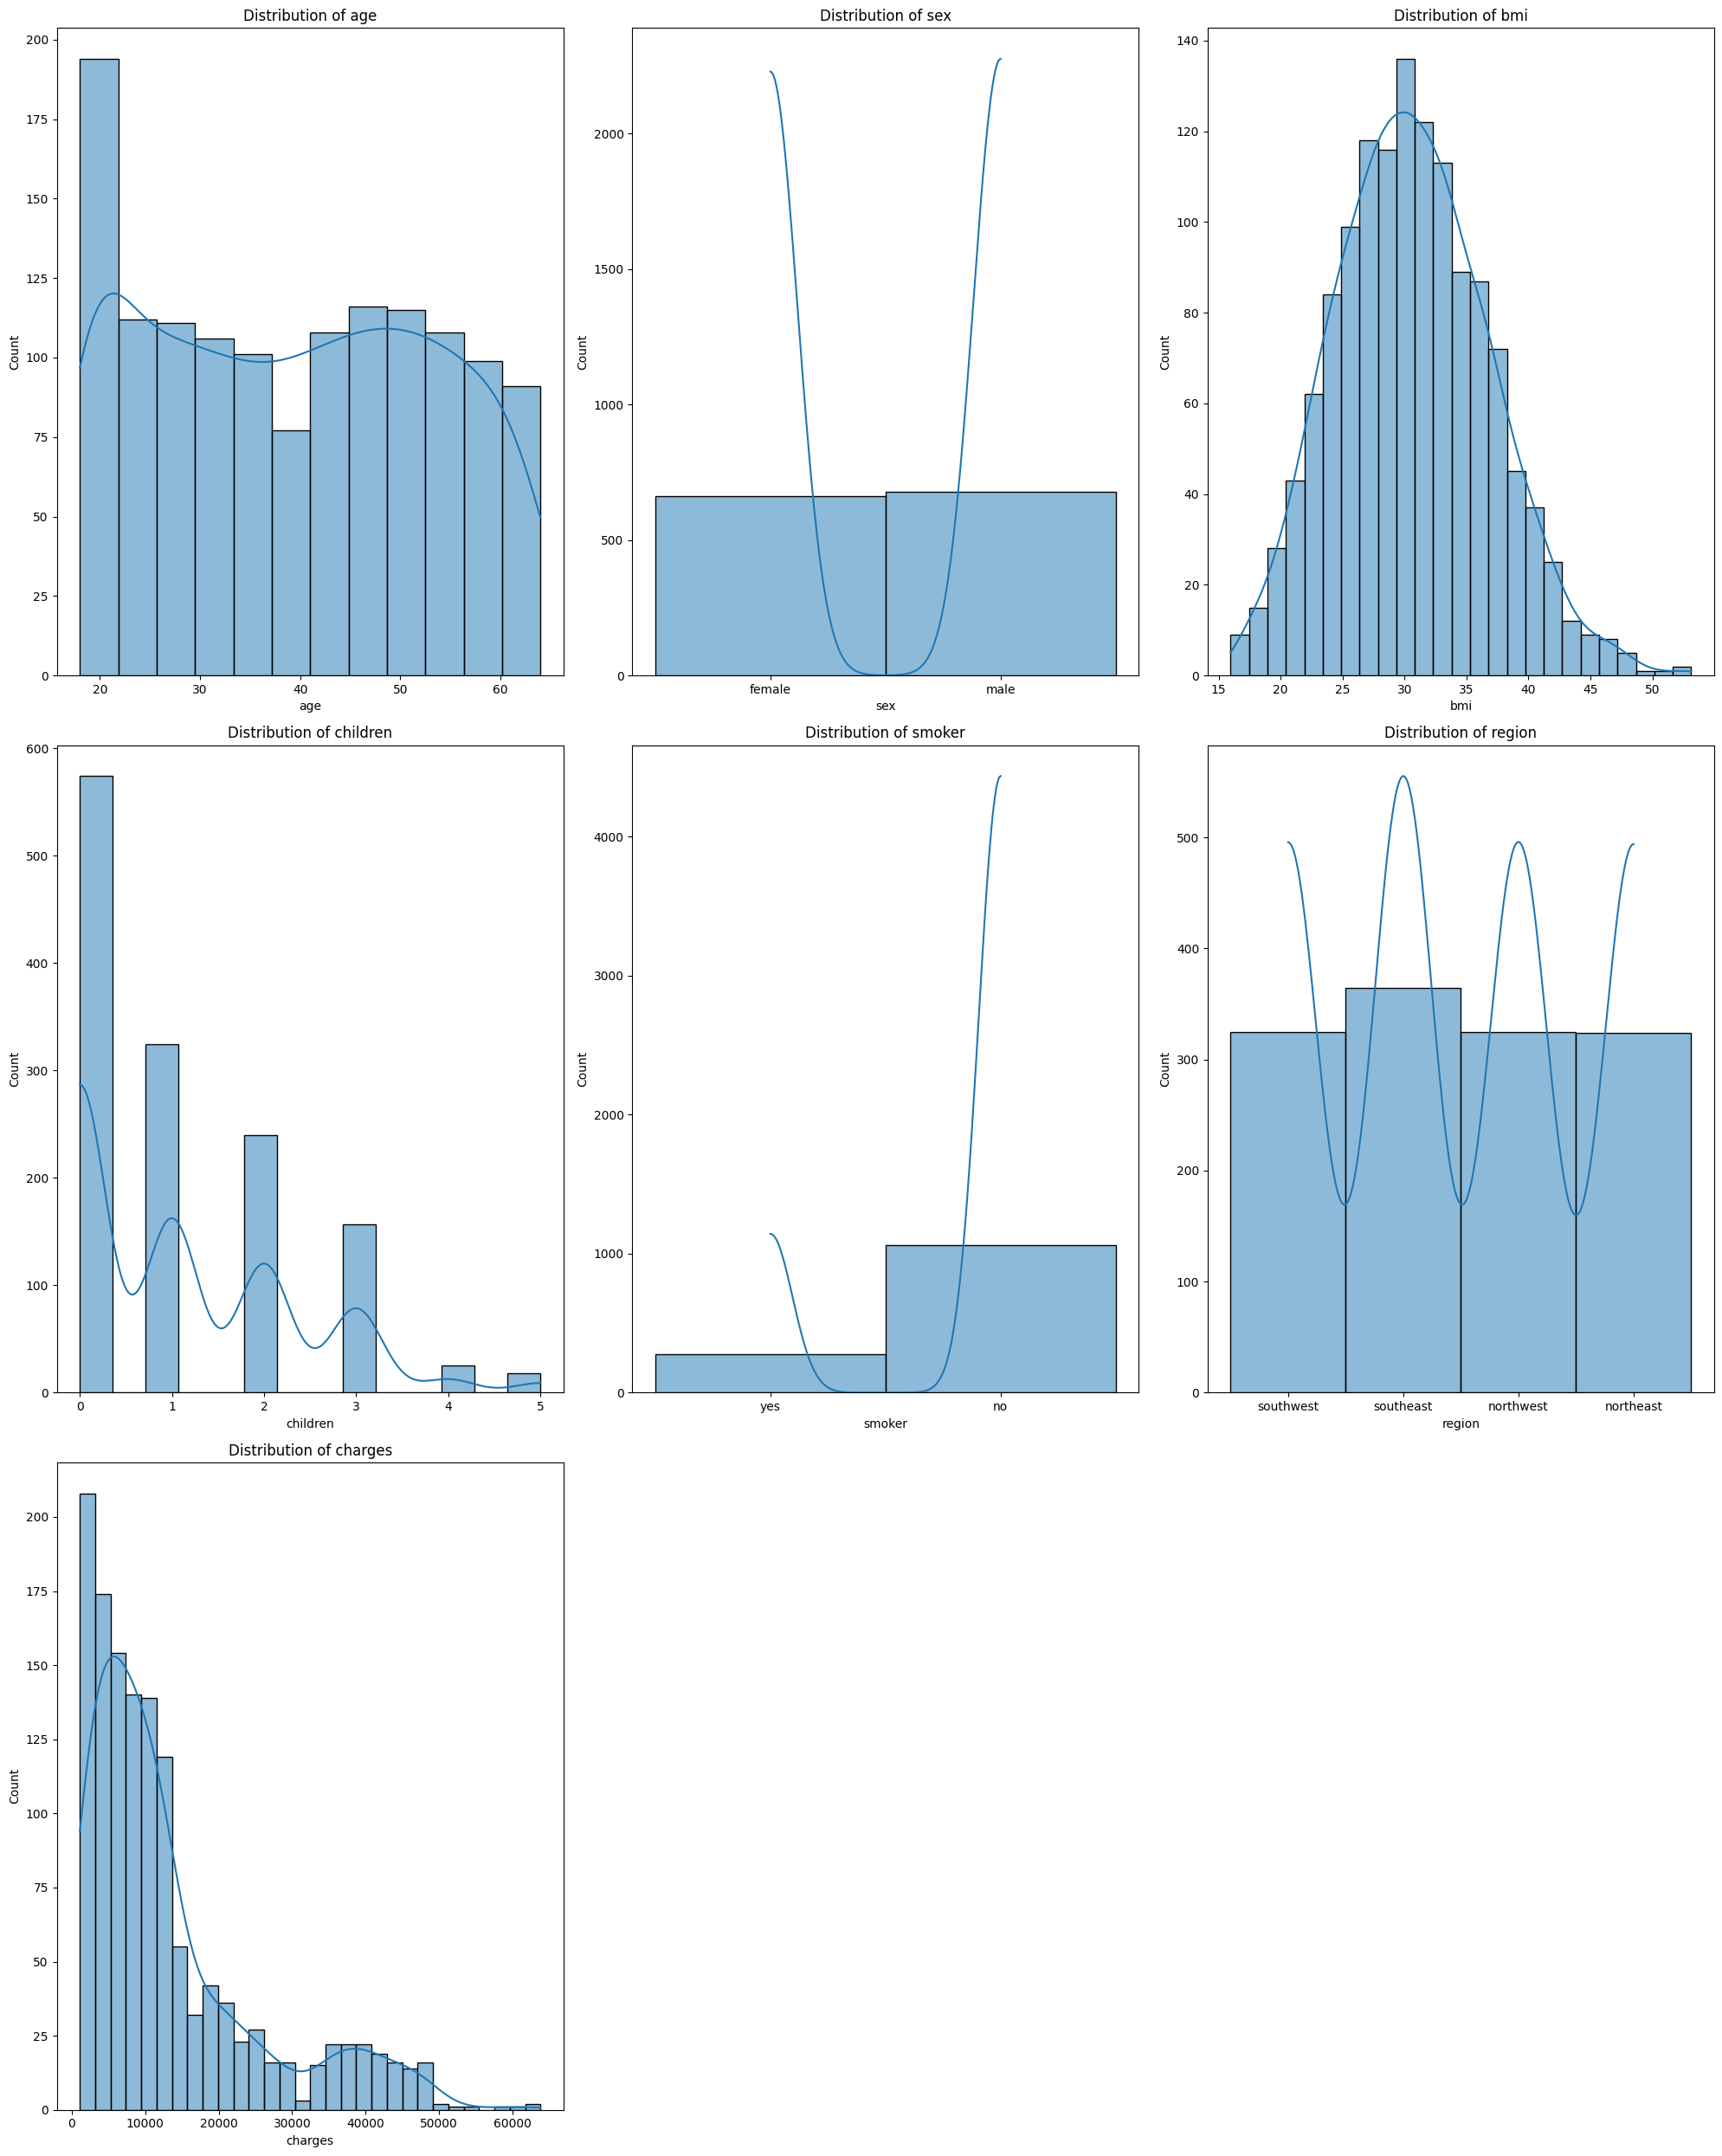

In [11]:

graph = 1
plt.figure(figsize=(20, 25), facecolor='white')  # facecolor to white for better readability

for column in data.columns:
    if graph <= 9:  # Ensures only the first 9 columns are plotted
        ax = plt.subplot(3, 3, graph)
        sns.histplot(data[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_title(f'Distribution of {column}')  # Include column name in the title
        graph += 1

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

This code snippet generates a 3x3 grid of histograms with KDE for the first nine columns of a DataFrame, using Seaborn for visualization. It sets the figure's facecolor to pink and ensures subplots are neatly arranged with tight_layout().

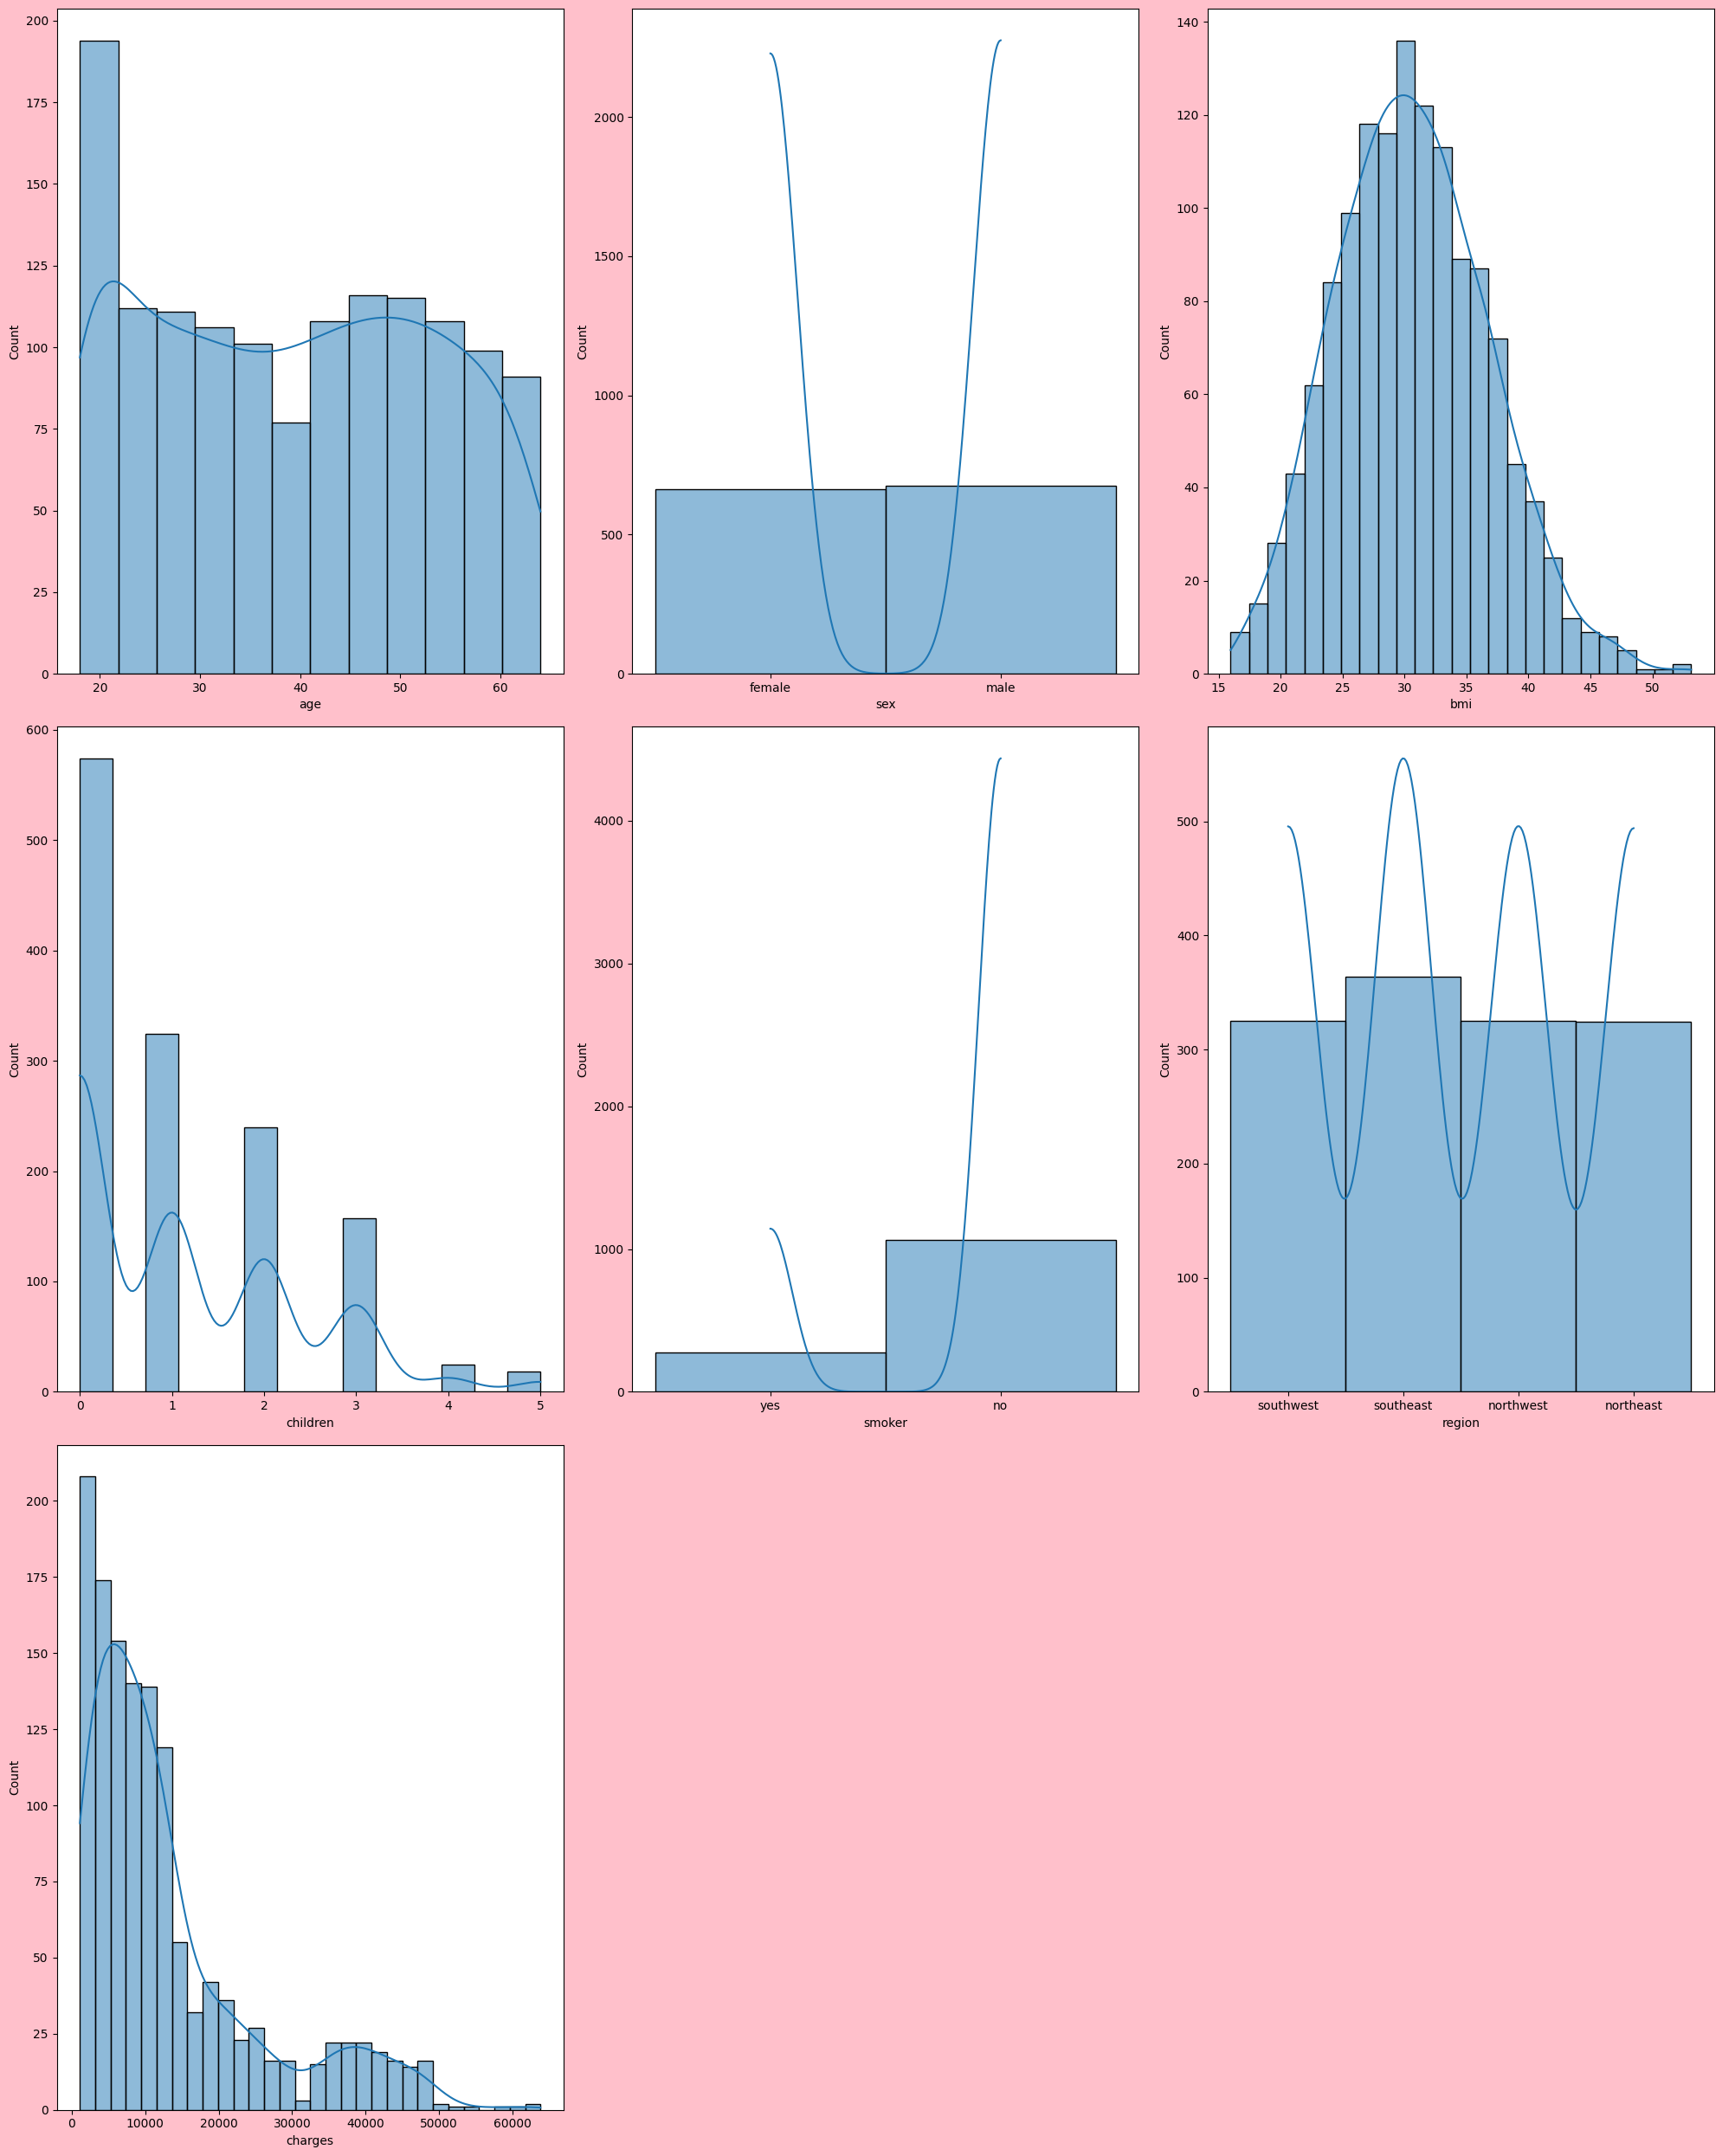

In [13]:
plt.figure(figsize=(20, 25), facecolor='pink')  # Facecolor is set to pink

for i, column in enumerate(data.columns[:9], 1):  # Enumerate starting from 1 for subplot indexing
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

In [22]:
import pandas as pd

# Load the dataset
data = pd.read_csv("medical_cost_insurance.csv")

# Check for null values
print("Null values in each column:\n", data.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values for categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with the mode

# Check if there are any missing values left
print("Null values after handling:\n", data.isnull().sum())

Null values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Null values after handling:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
